# Betweness Computations

In [1]:
pip install -q torch-geometric


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Mutag Dataset

In [5]:
import networkx as nx
import pandas as pd
import torch
import numpy as np
import os
import random
import sklearn
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout

from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import global_mean_pool, global_add_pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight


import matplotlib.pyplot as plt
from torch_geometric.utils import to_dense_adj
from torch_geometric.data import Data
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.nn import global_max_pool
from torch.nn import Sequential, Linear, ReLU


from torch_geometric.utils import to_networkx
from torch_geometric.loader import DataLoader


In [2]:
from torch_geometric.datasets import TUDataset

mutag = TUDataset(root = 'Over_Squashing_GNNs/data/Mutag', name = 'MUTAG')
print("len:", len(mutag))
print("num_classes:", mutag.num_classes)
print("num_node_features:", mutag.num_node_features)

len: 188
num_classes: 2
num_node_features: 7


Graph 1
Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])


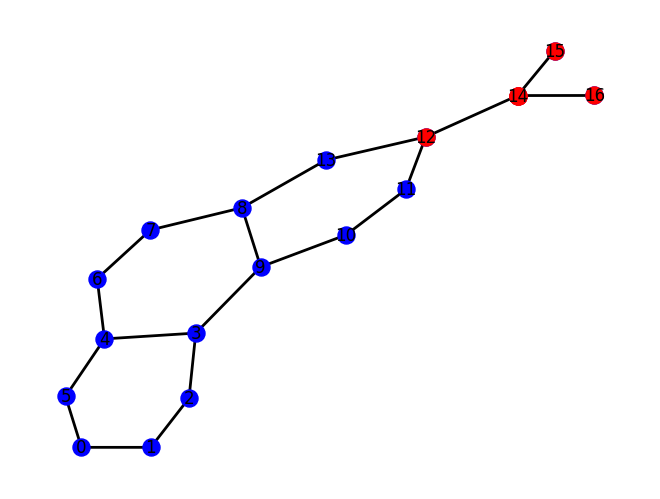

Graph 2
Data(edge_index=[2, 28], x=[13, 7], edge_attr=[28, 4], y=[1])


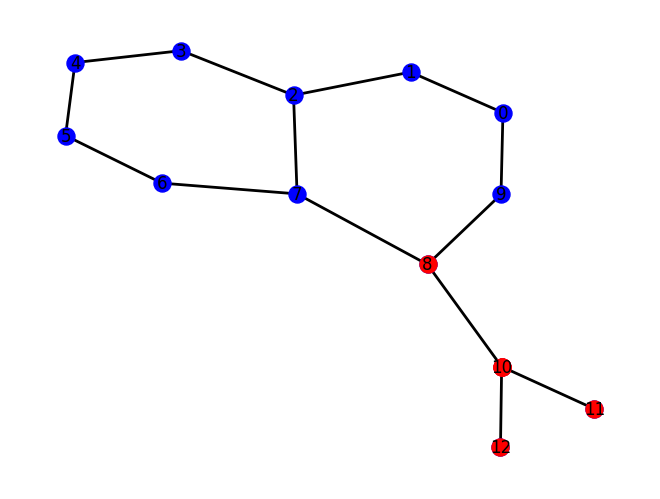

Graph 3
Data(edge_index=[2, 28], x=[13, 7], edge_attr=[28, 4], y=[1])


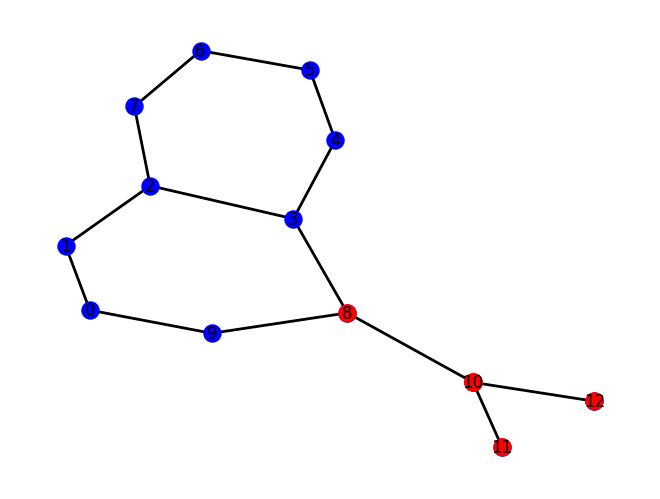

Graph 4
Data(edge_index=[2, 44], x=[19, 7], edge_attr=[44, 4], y=[1])


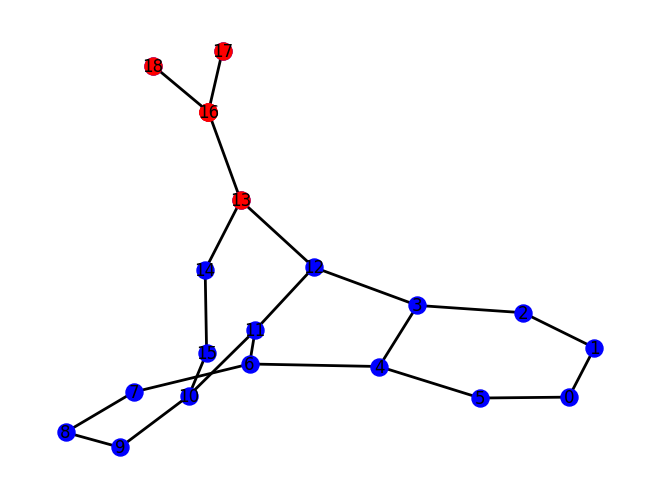

Graph 5
Data(edge_index=[2, 22], x=[11, 7], edge_attr=[22, 4], y=[1])


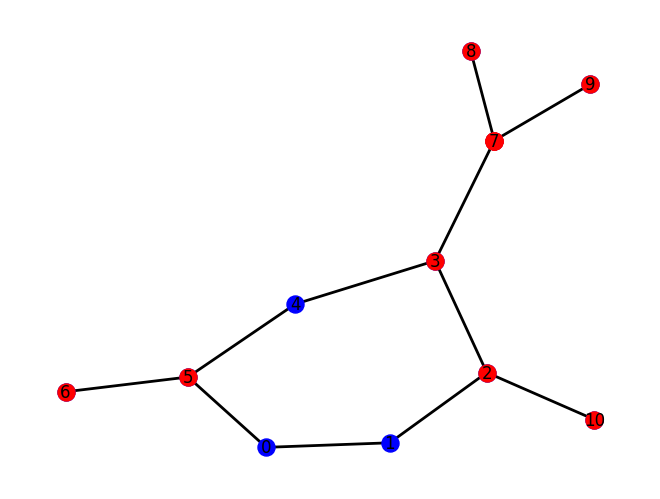

Graph 6
Data(edge_index=[2, 62], x=[28, 7], edge_attr=[62, 4], y=[1])


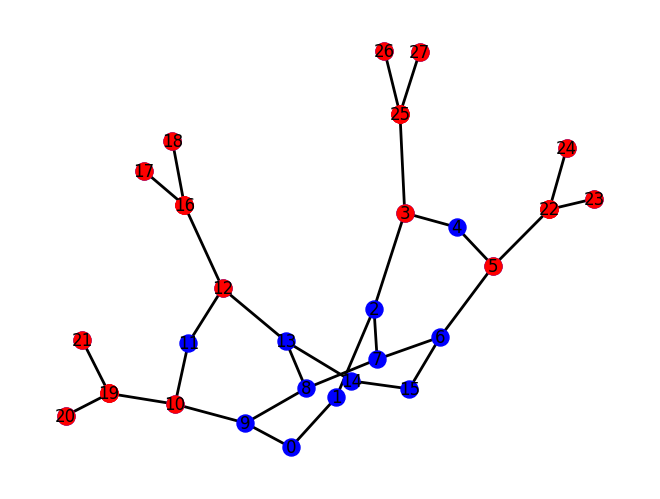

Graph 7
Data(edge_index=[2, 34], x=[16, 7], edge_attr=[34, 4], y=[1])


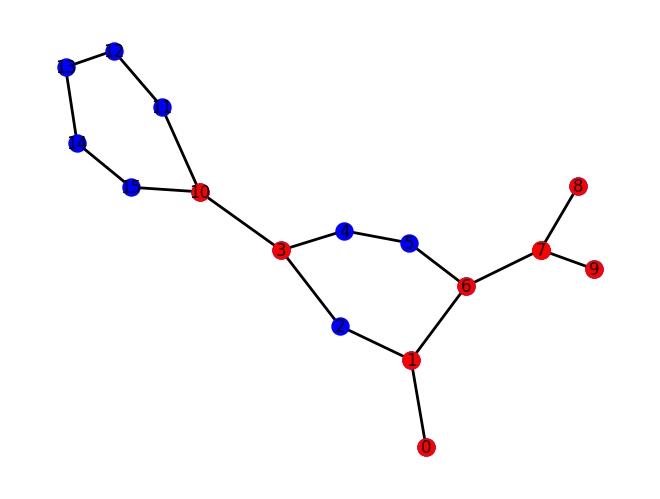

Graph 8
Data(edge_index=[2, 44], x=[20, 7], edge_attr=[44, 4], y=[1])


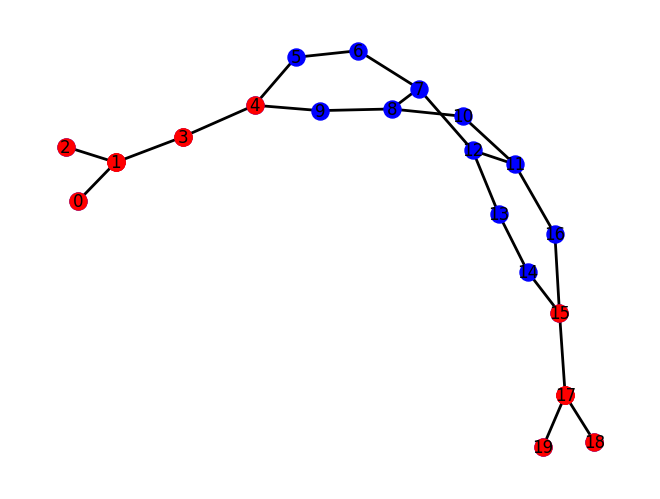

Graph 9
Data(edge_index=[2, 26], x=[12, 7], edge_attr=[26, 4], y=[1])


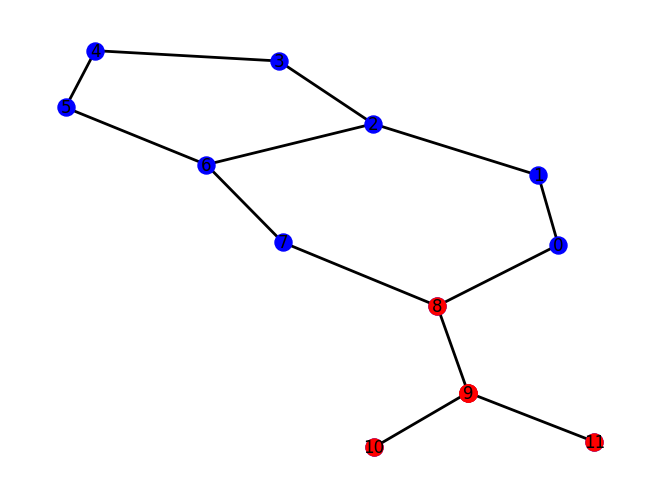

Graph 10
Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])


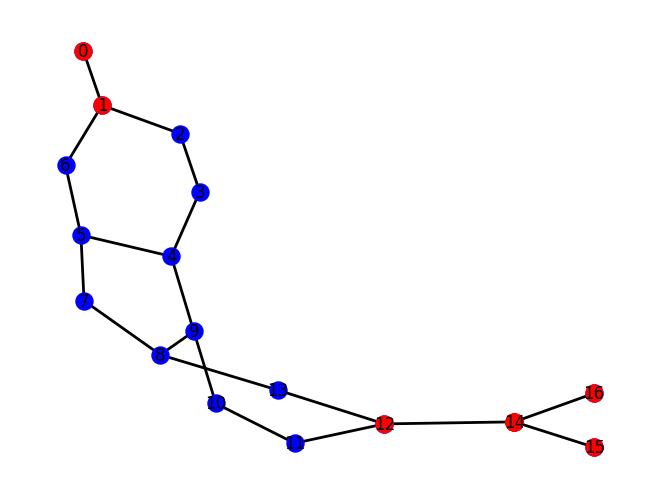

In [4]:
for i in range(10):
  data = mutag[i]
  G = to_networkx(data,to_undirected = True)
  pos = nx.spring_layout(G)
  nx.draw(G, pos, node_color = 'blue', edge_color = 'black',
          node_size = 150, width = 2, with_labels = True)
  bridges = nx.bridges(G)
  print(f"Graph {i+1}")
  for bridge in bridges:
    nx.draw_networkx_nodes(G, pos, nodelist = bridge, node_color = 'red', node_size = 150)
  print(data)
  plt.show()

In [6]:
def analyze_graph(dataset, graph_index, top_n=5):
    data = dataset[graph_index]
    graph = to_networkx(data,to_undirected = True)
    betweenness = nx.betweenness_centrality(graph)
    pos = nx.spring_layout(graph)
    top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:top_n]


    nx.draw(graph, pos, node_color='blue', edge_color='black', node_size=150, width=2, with_labels=True)

    nx.draw_networkx_nodes(graph, pos, nodelist=top_nodes, node_color='red', node_size=300)
    for node in top_nodes:
        plt.text(pos[node][0], pos[node][1] + 0.05, f"{betweenness[node]:.2f}", fontsize=8, color='red')

    plt.title(f"Top {top_n} Nodes by Betweenness Centrality")
    plt.show()





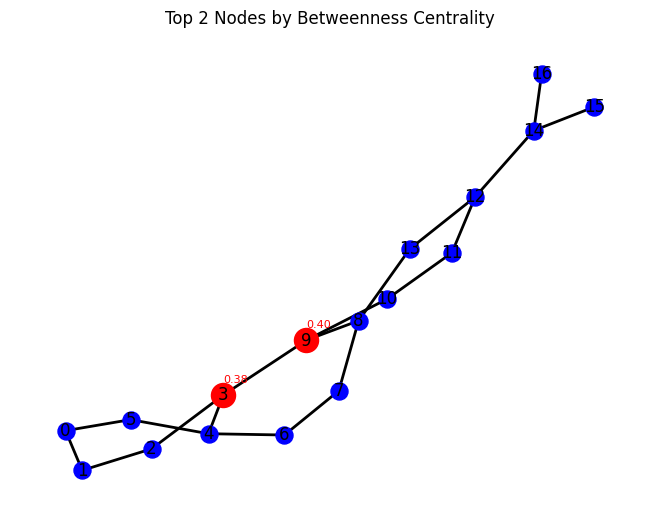

Graph 1
Betweenness Centrality: {0: 0.023611111111111107, 1: 0.04805555555555556, 2: 0.13277777777777774, 3: 0.3780555555555555, 4: 0.21861111111111112, 5: 0.08388888888888893, 6: 0.09, 7: 0.115, 8: 0.3269444444444445, 9: 0.4030555555555555, 10: 0.1744444444444444, 11: 0.13972222222222222, 12: 0.3486111111111111, 13: 0.24222222222222226, 14: 0.24166666666666667, 15: 0.0, 16: 0.0}



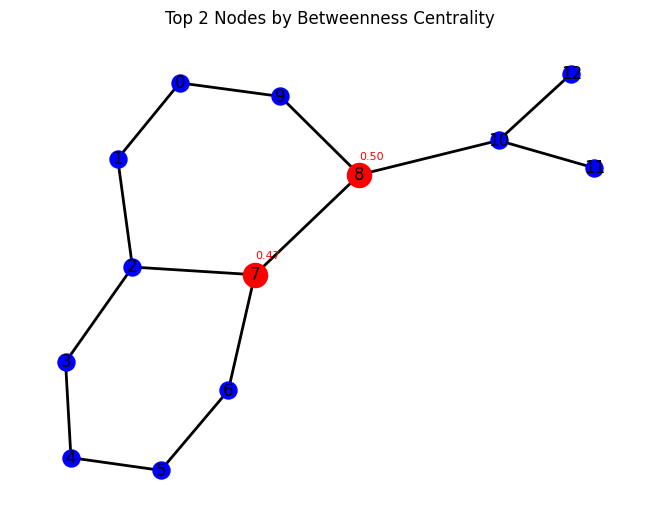

Graph 2
Betweenness Centrality: {0: 0.06565656565656565, 1: 0.09090909090909091, 2: 0.30808080808080807, 3: 0.11363636363636365, 4: 0.04292929292929293, 5: 0.06565656565656565, 6: 0.1590909090909091, 7: 0.4671717171717171, 8: 0.5, 9: 0.1111111111111111, 10: 0.3181818181818182, 11: 0.0, 12: 0.0}



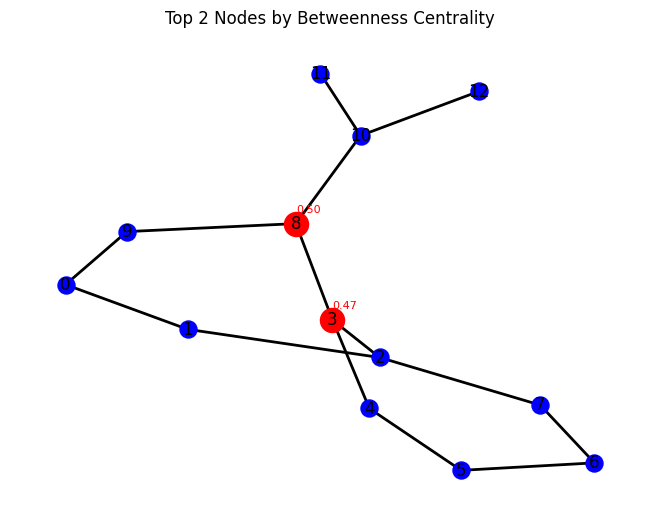

Graph 3
Betweenness Centrality: {0: 0.06565656565656566, 1: 0.09090909090909091, 2: 0.30808080808080807, 3: 0.4671717171717171, 4: 0.15909090909090906, 5: 0.06565656565656565, 6: 0.04292929292929293, 7: 0.11363636363636363, 8: 0.5, 9: 0.1111111111111111, 10: 0.3181818181818182, 11: 0.0, 12: 0.0}



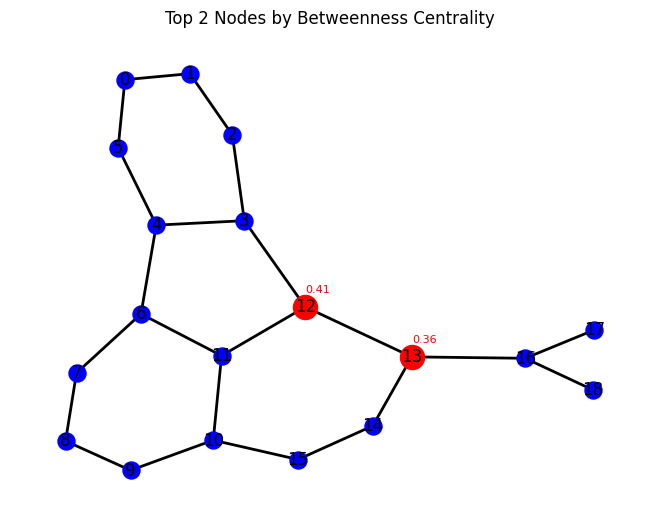

Graph 4
Betweenness Centrality: {0: 0.022875816993464054, 1: 0.032679738562091505, 2: 0.10784313725490197, 3: 0.2908496732026144, 4: 0.22222222222222224, 5: 0.08823529411764706, 6: 0.22222222222222218, 7: 0.07407407407407406, 8: 0.02832244008714597, 9: 0.0522875816993464, 10: 0.18518518518518515, 11: 0.26361655773420484, 12: 0.4052287581699347, 13: 0.36165577342047933, 14: 0.07407407407407407, 15: 0.065359477124183, 16: 0.21568627450980393, 17: 0.0, 18: 0.0}



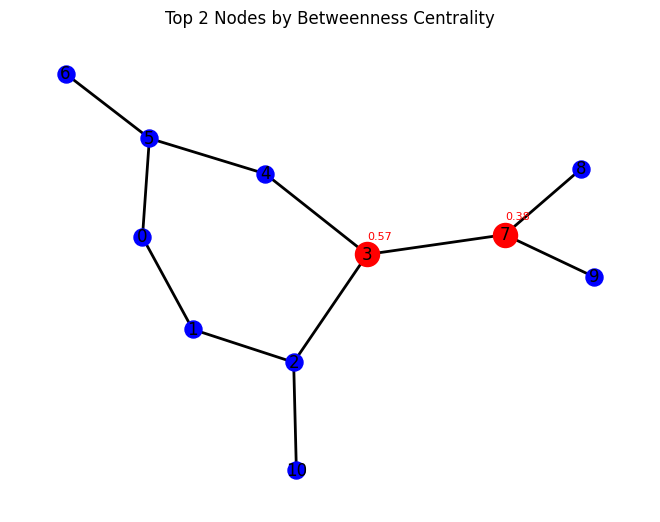

Graph 5
Betweenness Centrality: {0: 0.1, 1: 0.13333333333333333, 2: 0.34444444444444444, 3: 0.5666666666666667, 4: 0.26666666666666666, 5: 0.2777777777777778, 6: 0.0, 7: 0.37777777777777777, 8: 0.0, 9: 0.0, 10: 0.0}



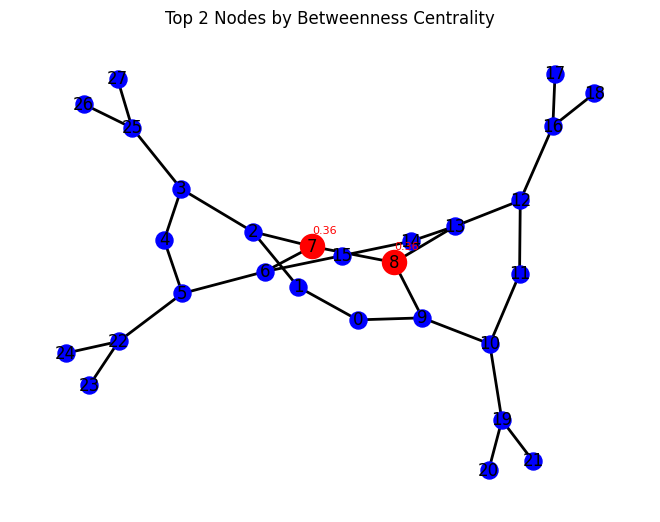

Graph 6
Betweenness Centrality: {0: 0.07407407407407408, 1: 0.07407407407407408, 2: 0.25403608736942074, 3: 0.2473884140550807, 4: 0.07597340930674265, 5: 0.24738841405508077, 6: 0.2540360873694207, 7: 0.35707502374169053, 8: 0.3570750237416905, 9: 0.2540360873694206, 10: 0.2473884140550807, 11: 0.07597340930674265, 12: 0.2473884140550808, 13: 0.25403608736942057, 14: 0.07407407407407408, 15: 0.07407407407407408, 16: 0.1452991452991453, 17: 0.0, 18: 0.0, 19: 0.1452991452991453, 20: 0.0, 21: 0.0, 22: 0.1452991452991453, 23: 0.0, 24: 0.0, 25: 0.1452991452991453, 26: 0.0, 27: 0.0}



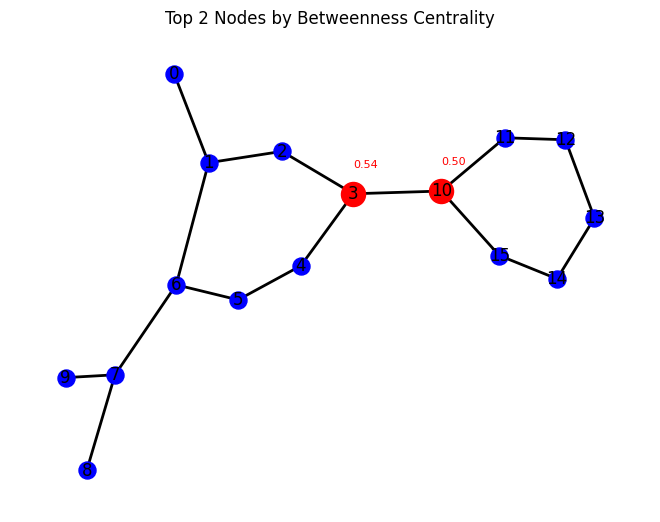

Graph 7
Betweenness Centrality: {0: 0.0, 1: 0.30952380952380953, 2: 0.2761904761904762, 3: 0.5380952380952382, 4: 0.20476190476190478, 5: 0.18095238095238098, 6: 0.37619047619047624, 7: 0.2571428571428572, 8: 0.0, 9: 0.0, 10: 0.49523809523809526, 11: 0.1619047619047619, 12: 0.06666666666666668, 13: 0.01904761904761905, 14: 0.06666666666666668, 15: 0.1619047619047619}



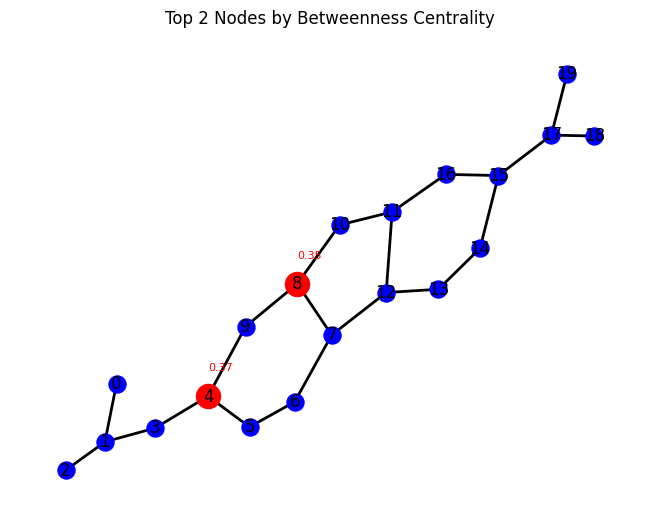

Graph 8
Betweenness Centrality: {0: 0.0, 1: 0.2046783625730994, 2: 0.0, 3: 0.2807017543859649, 4: 0.36549707602339176, 5: 0.09064327485380116, 6: 0.12280701754385964, 7: 0.24853801169590642, 8: 0.347953216374269, 9: 0.2982456140350877, 10: 0.24561403508771928, 11: 0.32456140350877194, 12: 0.24269005847953215, 13: 0.11695906432748537, 14: 0.07309941520467836, 15: 0.29532163742690054, 16: 0.2631578947368421, 17: 0.2046783625730994, 18: 0.0, 19: 0.0}



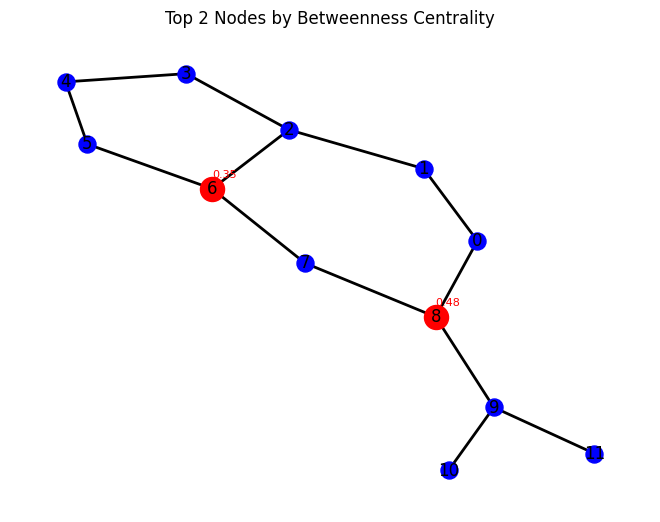

Graph 9
Betweenness Centrality: {0: 0.15454545454545454, 1: 0.14545454545454545, 2: 0.24545454545454545, 3: 0.05454545454545454, 4: 0.01818181818181818, 5: 0.10909090909090909, 6: 0.35454545454545455, 7: 0.3090909090909091, 8: 0.4818181818181818, 9: 0.34545454545454546, 10: 0.0, 11: 0.0}



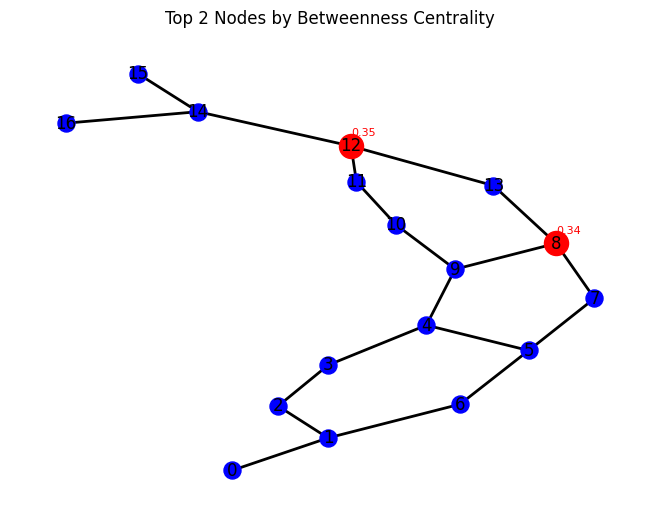

Graph 10
Betweenness Centrality: {0: 0.0, 1: 0.14583333333333334, 2: 0.05416666666666667, 3: 0.125, 4: 0.2791666666666667, 5: 0.2708333333333333, 6: 0.175, 7: 0.2, 8: 0.3375, 9: 0.29583333333333334, 10: 0.14166666666666666, 11: 0.10416666666666667, 12: 0.3458333333333333, 13: 0.275, 14: 0.24166666666666667, 15: 0.0, 16: 0.0}



In [7]:
for i in range(10):
    analyze_graph(mutag, i, top_n=2)
    print("Graph", i+1)
    print("Betweenness Centrality:", nx.betweenness_centrality(to_networkx(mutag[i], to_undirected=True)))
    print()

### Rewiring High betweeness Bridges

In [8]:
import networkx as nx
import torch
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

def identify_high_betweenness_bridges(graph, top_n=2):

    bridges = False #list(nx.bridges(graph))
    
    if not bridges:
        # Fall back to edges with high betweenness if no bridges found
        edge_betweenness = nx.edge_betweenness_centrality(graph)
        sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
        return [edge for edge, _ in sorted_edges[:top_n]]
    
    # Calculate edge betweenness centrality
    edge_betweenness = nx.edge_betweenness_centrality(graph)
    
    # Sort bridges by betweenness centrality
    sorted_bridges = sorted([(u, v) for u, v in bridges], 
                           key=lambda edge: edge_betweenness.get(edge, edge_betweenness.get((edge[1], edge[0]), 0)), 
                           reverse=True)
    
    return sorted_bridges[:top_n]

def rewire_high_betweenness_bridges(graph, top_n=2, connect_neighbors=False):
    rewired_graph = graph.copy()
    
    # Identify high betweenness bridges
    high_betweenness_bridges = identify_high_betweenness_bridges(graph, top_n)
    
    for u, v in high_betweenness_bridges:
        # Get neighbors of u excluding v
        neighbors_u = [n for n in graph.neighbors(u) if n != v]
        
        # Get neighbors of v excluding u
        neighbors_v = [n for n in graph.neighbors(v) if n != u]
        
        # Connect neighbors of u to v
        for neighbor in neighbors_u:
            if not rewired_graph.has_edge(neighbor, v):
                rewired_graph.add_edge(neighbor, v)
        
        # Connect neighbors of v to u
        for neighbor in neighbors_v:
            if not rewired_graph.has_edge(neighbor, u):
                rewired_graph.add_edge(neighbor, u)
        
        # Optionally connect neighbors of u to neighbors of v
        if connect_neighbors:
            for neighbor_u in neighbors_u:
                for neighbor_v in neighbors_v:
                    if neighbor_u != neighbor_v and not rewired_graph.has_edge(neighbor_u, neighbor_v):
                        rewired_graph.add_edge(neighbor_u, neighbor_v)
    
    return rewired_graph, high_betweenness_bridges

def visualize_rewiring(original_graph, rewired_graph, high_betweenness_bridges):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    

    bridge_nodes = set()
    for u, v in high_betweenness_bridges:
        bridge_nodes.add(u)
        bridge_nodes.add(v)
    
    # Get neighbors of bridge nodes
    neighbors_of_bridge_nodes = set()
    for node in bridge_nodes:
        for neighbor in original_graph.neighbors(node):
            if neighbor not in bridge_nodes:
                neighbors_of_bridge_nodes.add(neighbor)
    
    # Compute layout for consistent positions
    pos = nx.spring_layout(original_graph, seed=42)
    
    # Draw original graph
    ax1.set_title("Original Graph")
    nx.draw_networkx_edges(original_graph, pos, ax=ax1, alpha=0.3)
    nx.draw_networkx_nodes(original_graph, pos, ax=ax1, node_color='blue', node_size=100)
    nx.draw_networkx_labels(original_graph, pos, ax=ax1, font_size=10)
    
    # Highlight high betweenness bridges in original graph
    nx.draw_networkx_edges(original_graph, pos, ax=ax1, 
                          edgelist=high_betweenness_bridges, 
                          edge_color='red', width=3)
    nx.draw_networkx_nodes(original_graph, pos, ax=ax1,
                          nodelist=list(bridge_nodes),
                          node_color='red', node_size=150)
    nx.draw_networkx_nodes(original_graph, pos, ax=ax1,
                          nodelist=list(neighbors_of_bridge_nodes),
                          node_color='green', node_size=120)

    ax2.set_title("Rewired Graph")
    nx.draw_networkx_edges(rewired_graph, pos, ax=ax2, alpha=0.3)
    nx.draw_networkx_nodes(rewired_graph, pos, ax=ax2, node_color='blue', node_size=100)
    nx.draw_networkx_labels(rewired_graph, pos, ax=ax2, font_size=10)
    
    # Highlight high betweenness bridges in rewired graph
    nx.draw_networkx_edges(rewired_graph, pos, ax=ax2, 
                          edgelist=high_betweenness_bridges, 
                          edge_color='red', width=3)
    nx.draw_networkx_nodes(rewired_graph, pos, ax=ax2,
                          nodelist=list(bridge_nodes),
                          node_color='red', node_size=150)
    nx.draw_networkx_nodes(rewired_graph, pos, ax=ax2,
                          nodelist=list(neighbors_of_bridge_nodes),
                          node_color='green', node_size=120)
    
    # Find new edges in rewired graph
    original_edges = set(original_graph.edges())
    rewired_edges = set(rewired_graph.edges())
    new_edges = rewired_edges - original_edges
    

    nx.draw_networkx_edges(rewired_graph, pos, ax=ax2, 
                          edgelist=list(new_edges), 
                          edge_color='orange', width=2, style='dashed')
    
    plt.tight_layout()
    plt.show()
    
    # Print information about rewiring
    print(f"Number of bridges rewired: {len(high_betweenness_bridges)}")
    print(f"Number of new edges added: {len(new_edges)}")
    print(f"High betweenness bridges: {high_betweenness_bridges}")

def rewire_betweenness_bridges_torch_geo(data, top_n=2, connect_neighbors=False):

    # Convert to NetworkX graph
    graph = to_networkx(data, to_undirected=True)
    
    # Perform rewiring
    rewired_graph, high_betweenness_bridges = rewire_high_betweenness_bridges(graph, top_n, connect_neighbors)
    
    # Convert back to edge index format
    edges = list(rewired_graph.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    # Make undirected by adding reverse edges
    edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)
    
    # Remove duplicate edges
    edge_index = torch.unique(edge_index, dim=1)
    
    return edge_index

def visualize_graph_rewiring(data, top_n=2, connect_neighbors=False):

    original_graph = to_networkx(data, to_undirected=True)
    
    # Perform rewiring and get bridges
    rewired_graph, high_betweenness_bridges = rewire_high_betweenness_bridges(original_graph, top_n, connect_neighbors)

    visualize_rewiring(original_graph, rewired_graph, high_betweenness_bridges)

    edges = list(rewired_graph.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)
    edge_index = torch.unique(edge_index, dim=1)
    
    return edge_index

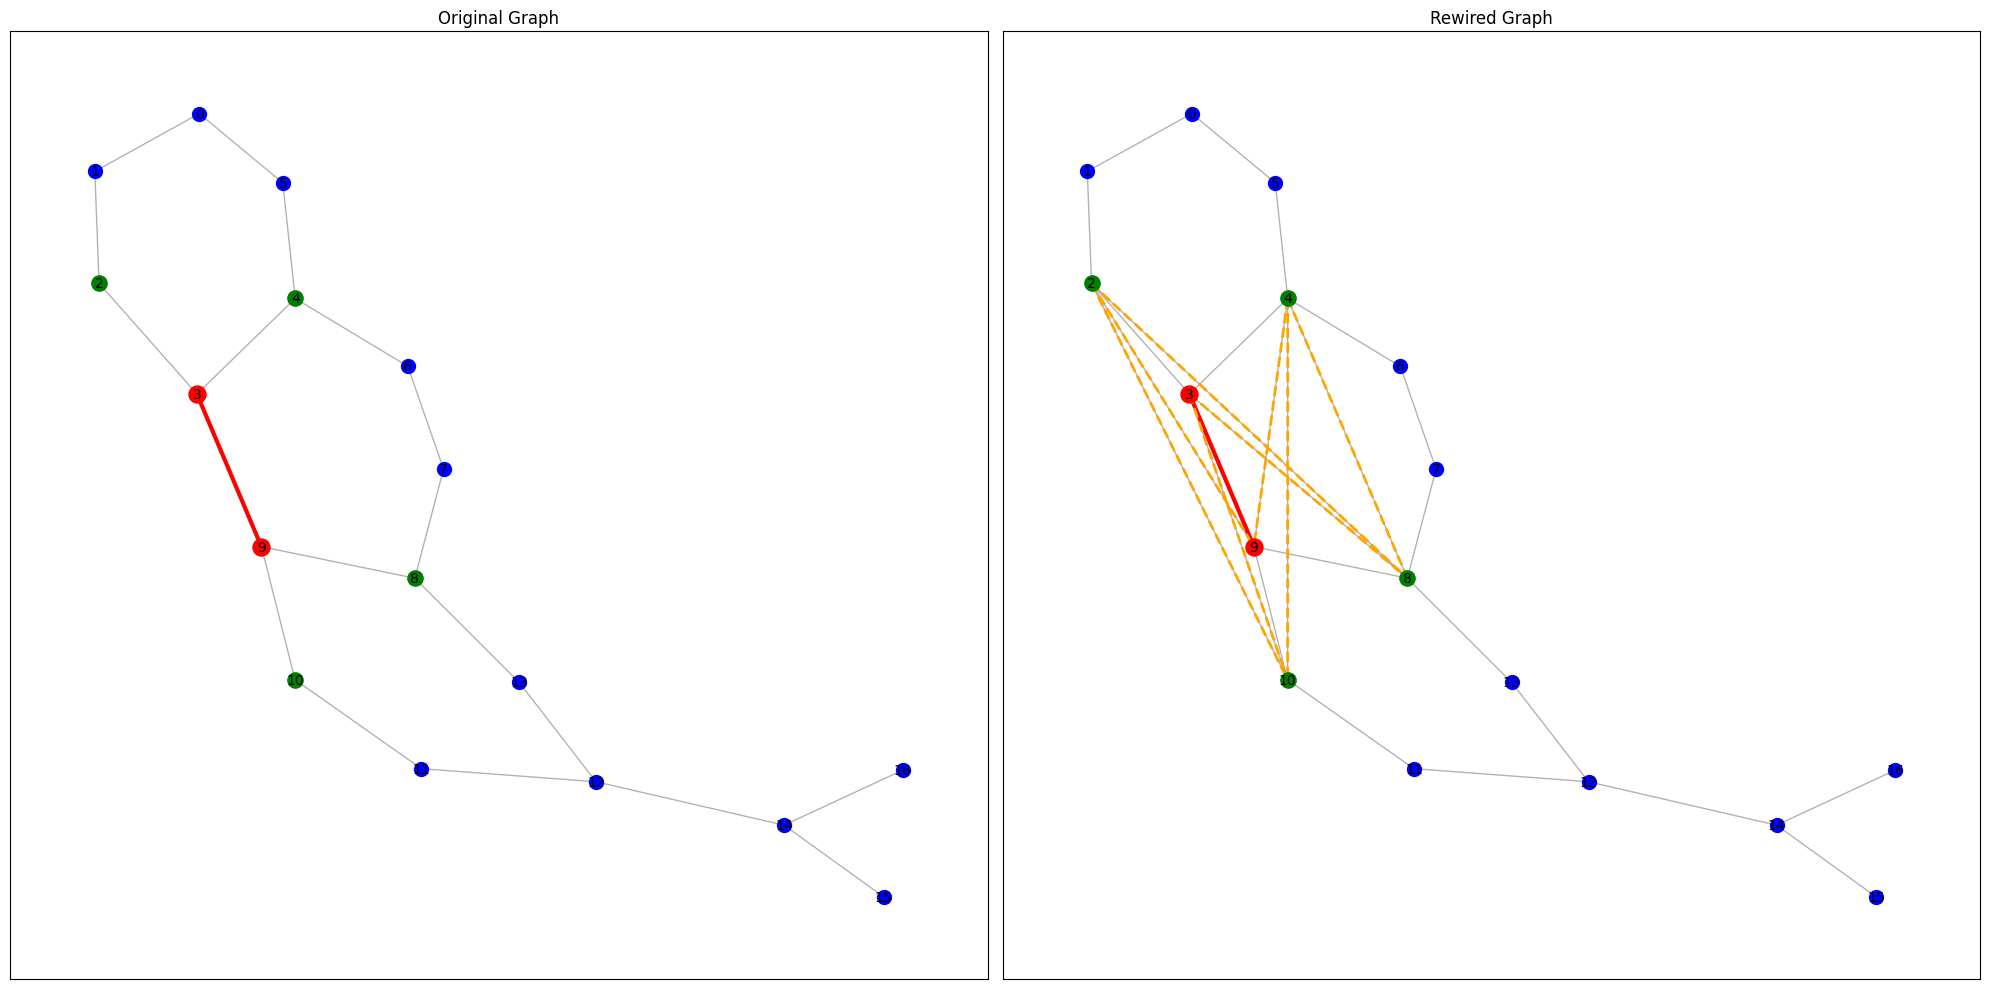

Number of bridges rewired: 1
Number of new edges added: 8
High betweenness bridges: [(3, 9)]


In [24]:
index = 0
data = mutag[index]
rewired_edge_index = visualize_graph_rewiring(data, top_n=1, connect_neighbors=True)

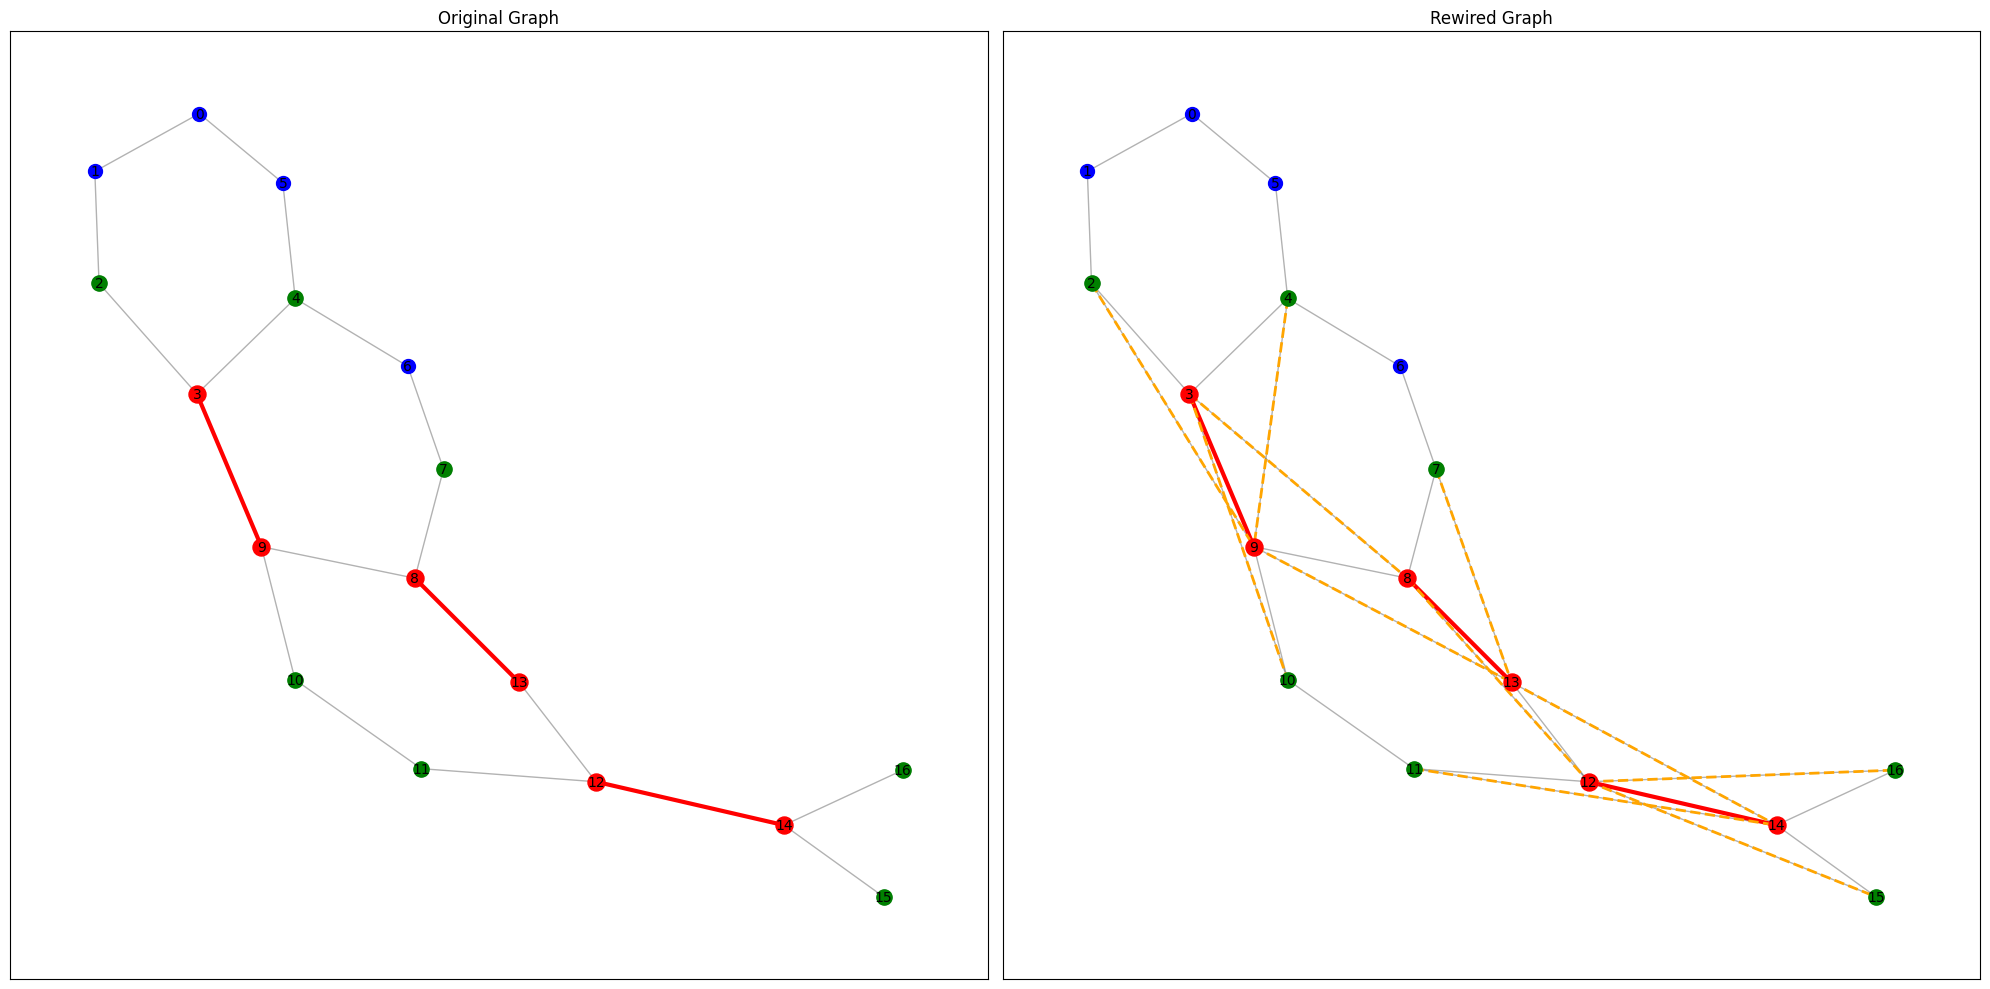

Number of bridges rewired: 3
Number of new edges added: 11
High betweenness bridges: [(3, 9), (12, 14), (8, 13)]
Graph 1


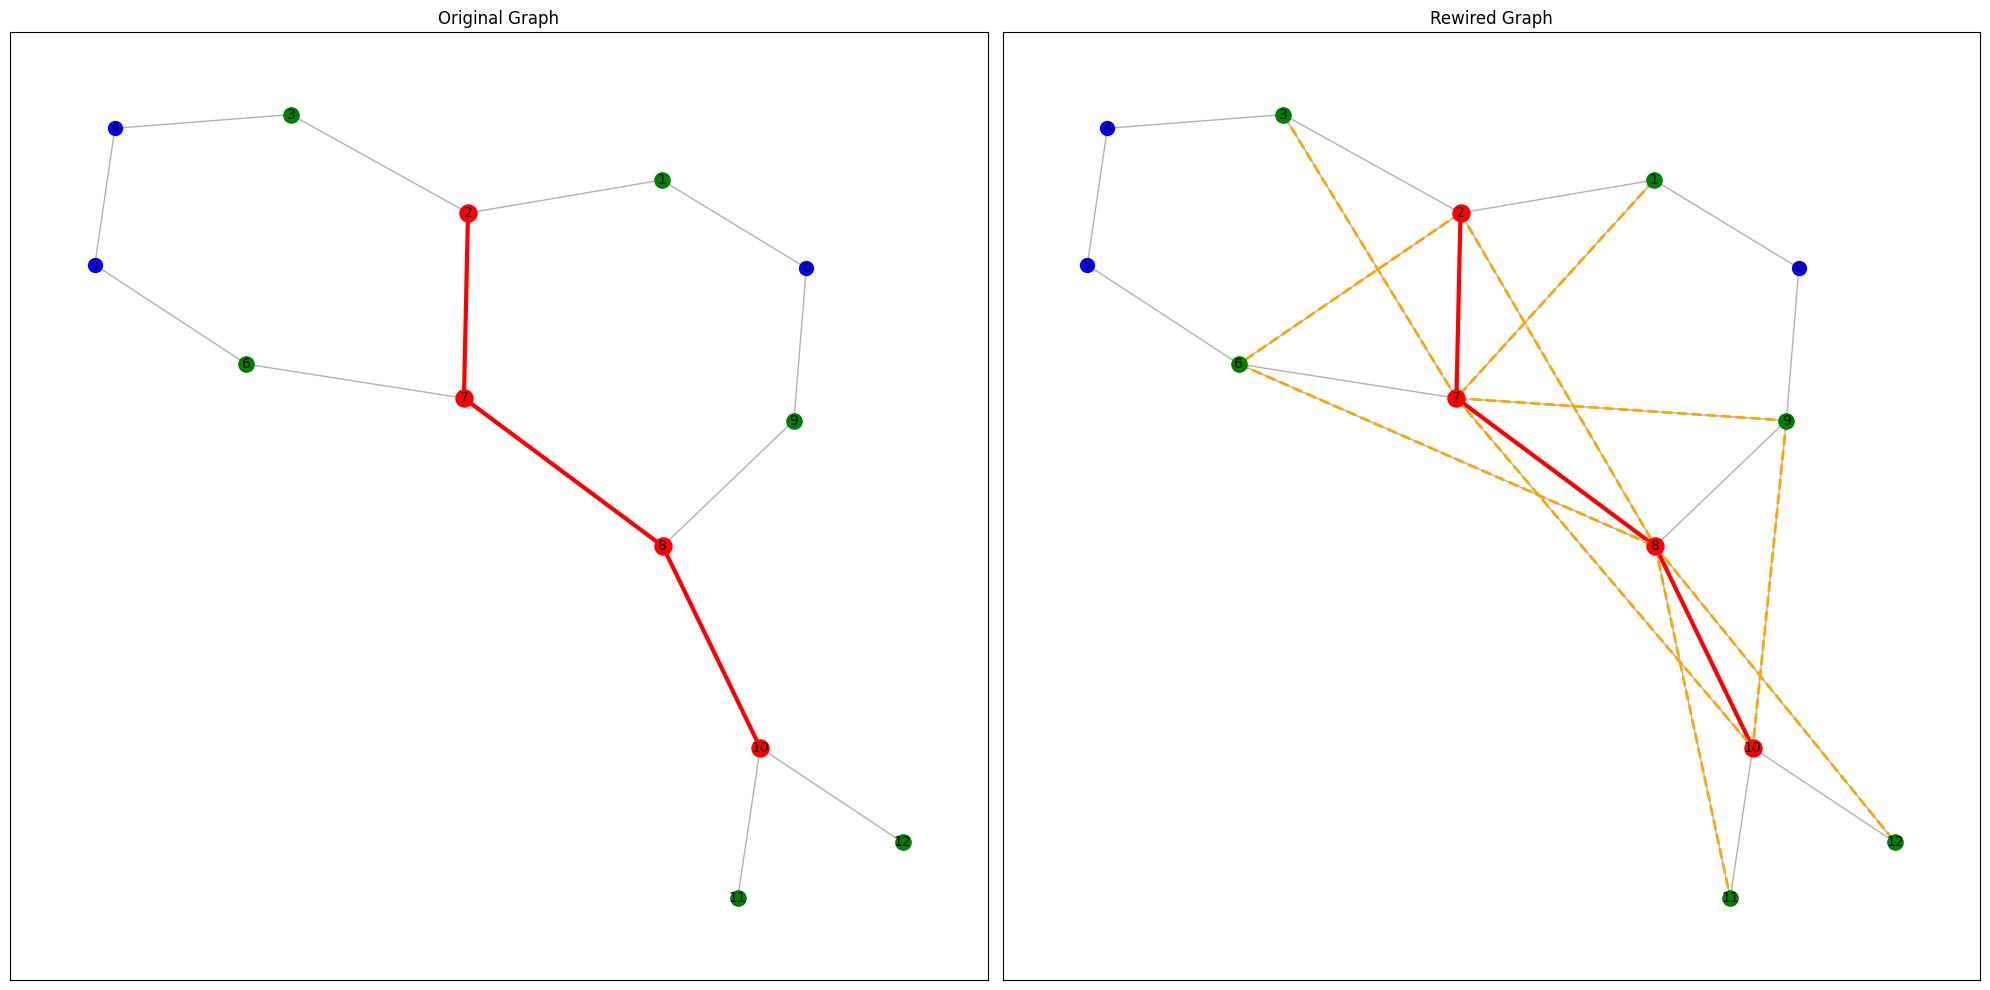

Number of bridges rewired: 3
Number of new edges added: 10
High betweenness bridges: [(7, 8), (8, 10), (2, 7)]
Graph 2


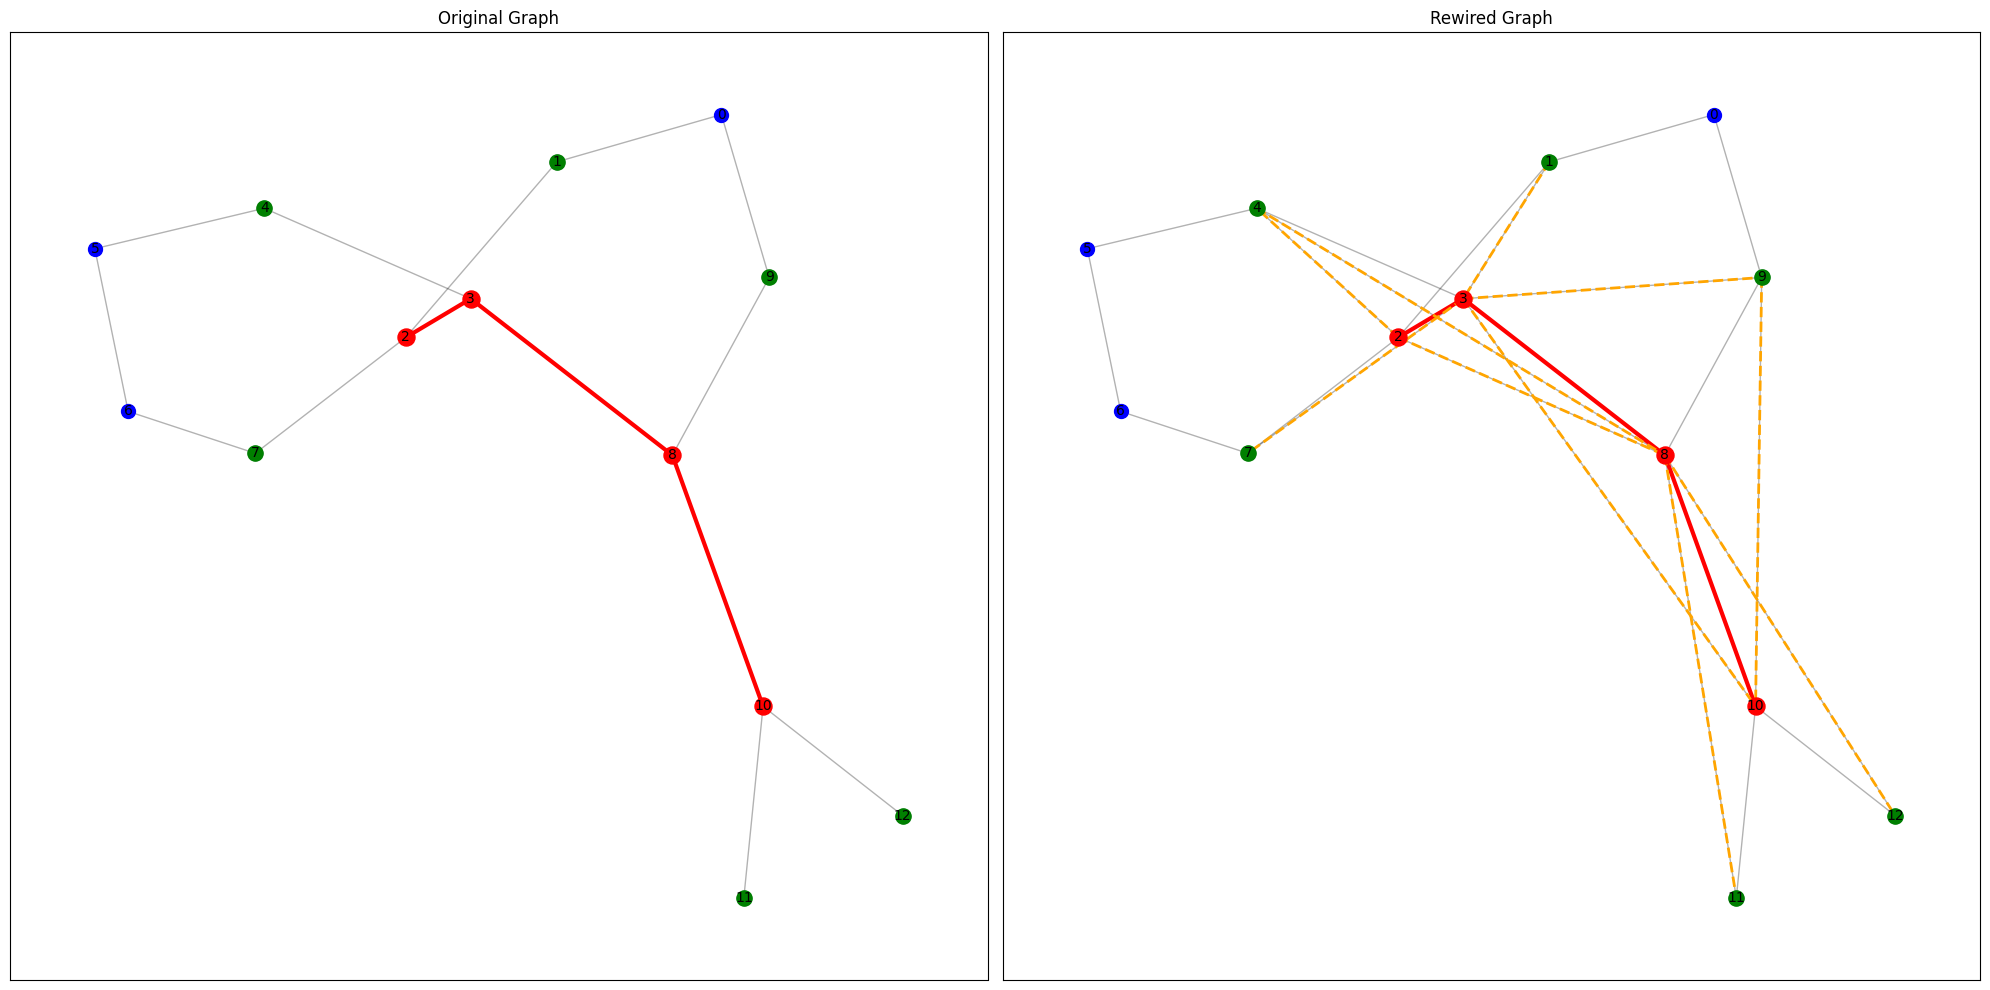

Number of bridges rewired: 3
Number of new edges added: 10
High betweenness bridges: [(3, 8), (8, 10), (2, 3)]
Graph 3


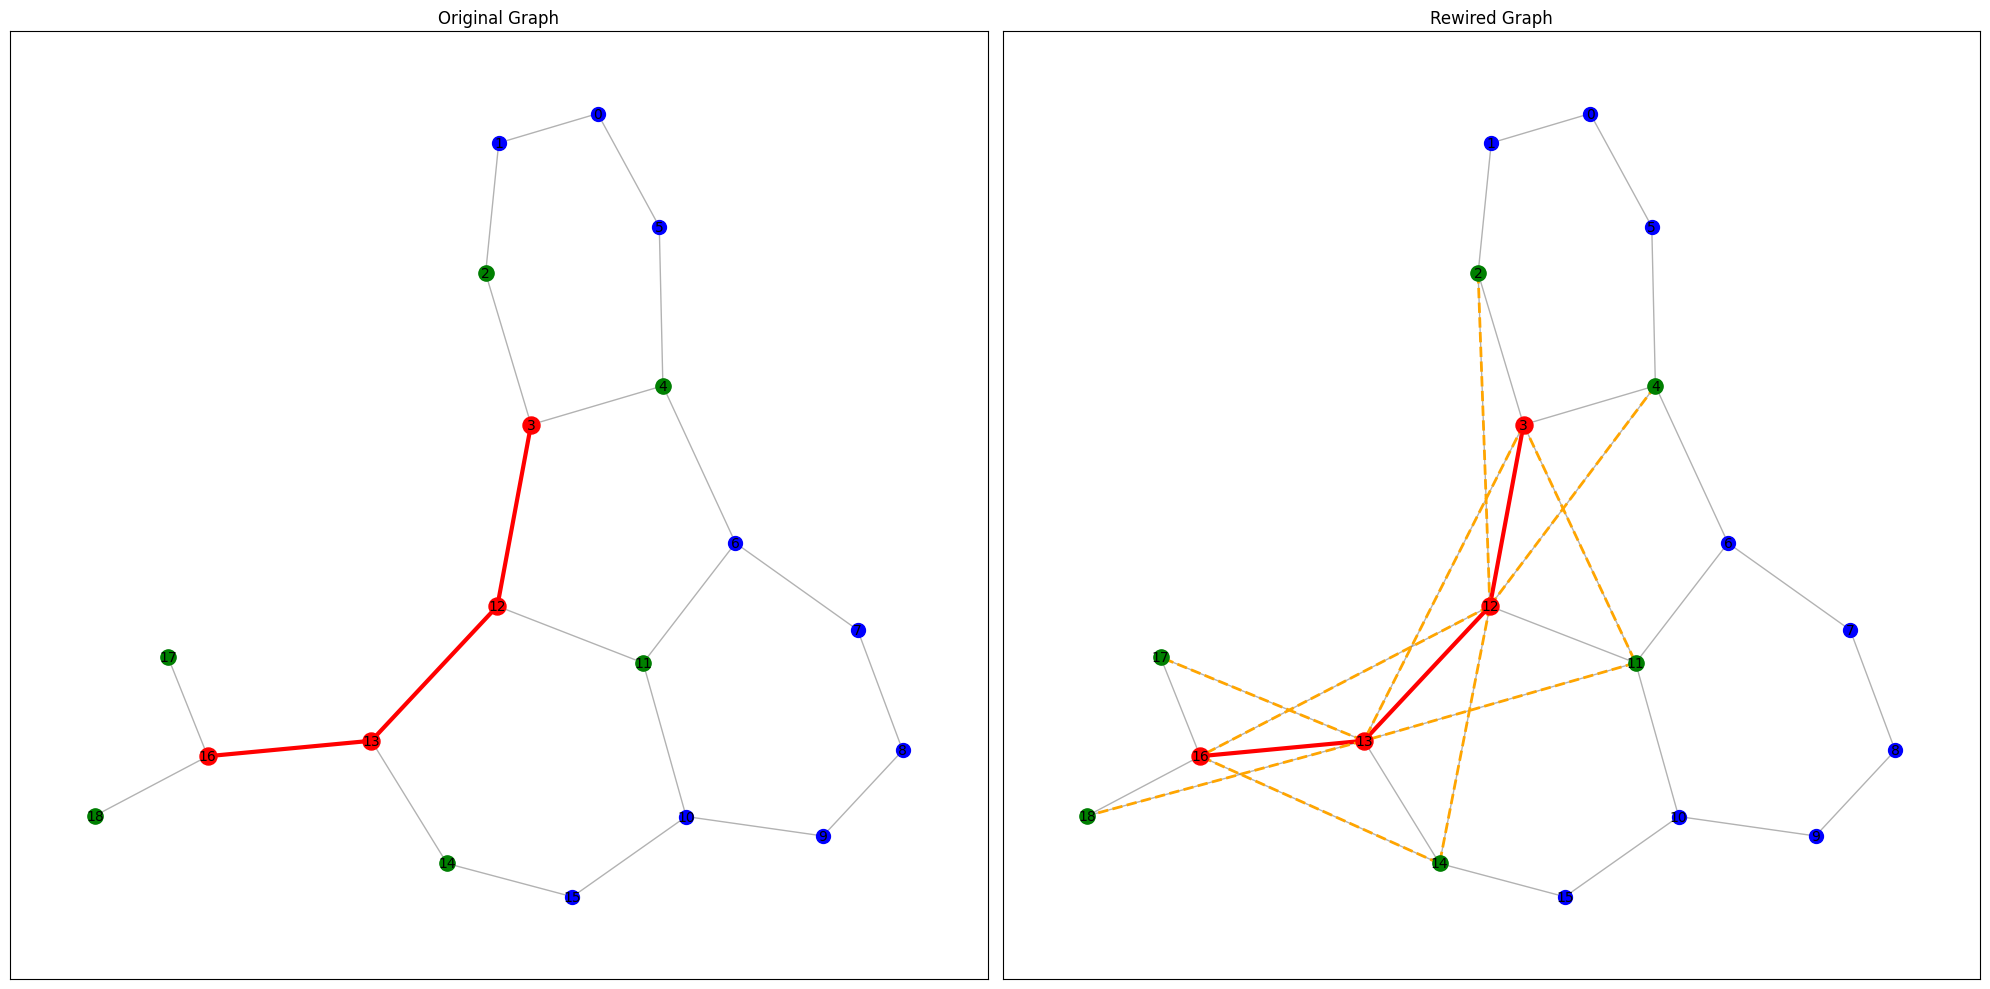

Number of bridges rewired: 3
Number of new edges added: 10
High betweenness bridges: [(12, 13), (3, 12), (13, 16)]
Graph 4


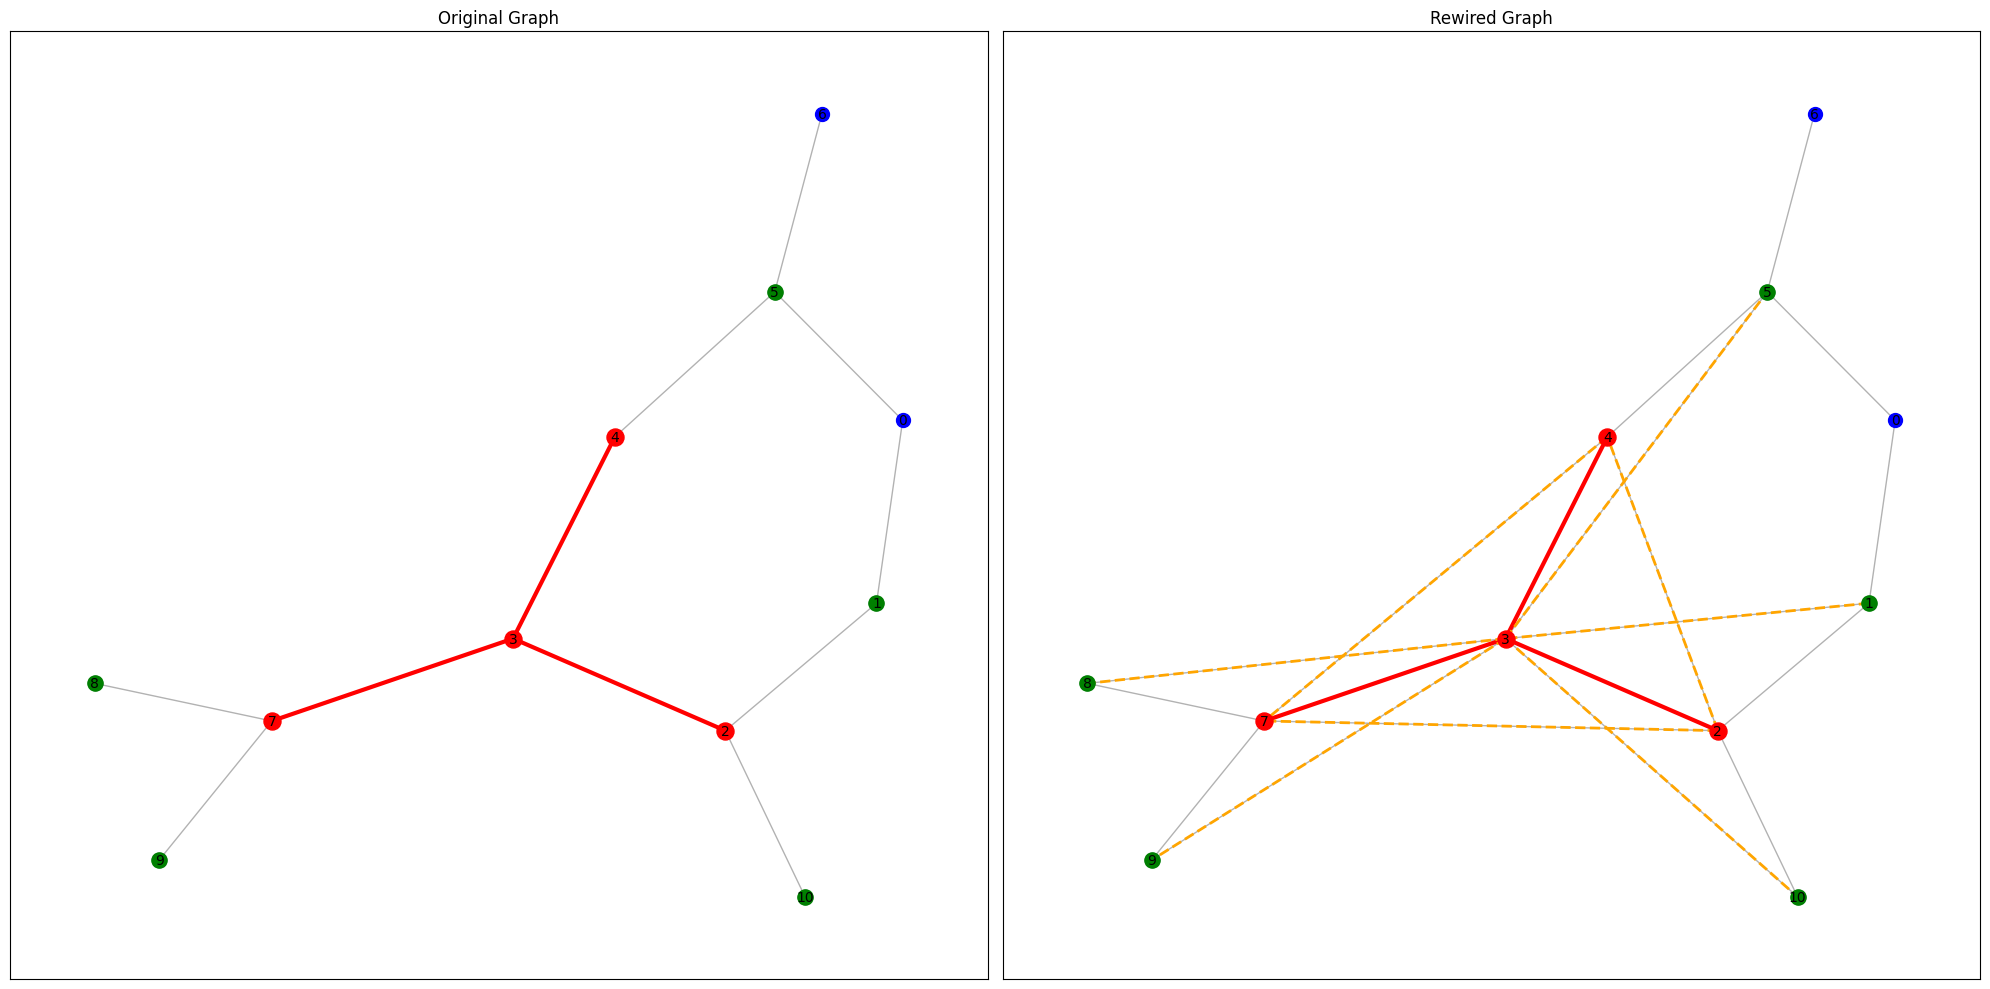

Number of bridges rewired: 3
Number of new edges added: 8
High betweenness bridges: [(3, 7), (2, 3), (3, 4)]
Graph 5


In [10]:
for i in range(5):
    data = mutag[i]
    rewired_edge_index = visualize_graph_rewiring(data, top_n=3, connect_neighbors=False)
    print("Graph", i+1)